# IBM Quantum Challenge 2020

In [24]:
import qiskit
from qiskit import IBMQ

with open('token.txt', 'r') as f:
    IBMQ.save_account(f.read())

## Example Usage: Grover's Algorithm

In [176]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def U0(circuit):
    """State preparation"""
    data, aux1, aux2 = circuit.qregs
    circuit.x(aux2)
    circuit.h((*data, *aux2))
    circuit.barrier((*data, *aux1, *aux2))

def Uf(circuit):
    """3 Qubit Oracle operator"""
    data, aux1, aux2 = circuit.qregs
    circuit.ccx(data[0], data[1], aux1)
    circuit.ccx(aux1, data[2], aux2)
    circuit.ccx(data[0], data[1], aux1)
    circuit.barrier((*data, *aux1, *aux2))
    
def Ud(circuit):
    """Grover's diffusion operator"""
    data, aux1, aux2 = circuit.qregs
    circuit.h(data)
    circuit.x(data)
    circuit.h(data[-1])
    circuit.ccx(*data)
    circuit.h(data[-1])
    circuit.x(data)
    circuit.h(data)
    circuit.barrier((*data, *aux1, *aux2))

def M(circuit):
    """Measurement"""
    data, *_ = circuit.qregs
    output, *_ = circuit.cregs
    circuit.measure(data, output)

In [181]:
# Initialize components
qc = QuantumCircuit()
qr1 = QuantumRegister(3, 'data')
qr2 = QuantumRegister(1, 'aux1')
qr3 = QuantumRegister(1, 'aux2')
cr = ClassicalRegister(3, 'output')

In [182]:
# Register components on circuit
qc.add_register(qr1)
qc.add_register(qr2)
qc.add_register(qr3)
qc.add_register(cr)

In [183]:
# Phase preparation
U0(qc)

# Grover Operator iteration 1
Uf(qc)
Ud(qc)

# Grover Operator iteration 2
Uf(qc)
Ud(qc)

# Measurement
M(qc)

# Check circuit
qc.draw()

┌───┐      ░                 ░ ┌───┐┌───┐          ┌───┐┌───┐      ░ »
  data_0: ┤ H ├──────░───■─────────■───░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─»
          ├───┤      ░   │         │   ░ ├───┤├───┤       │  ├───┤├───┤      ░ »
  data_1: ┤ H ├──────░───■─────────■───░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─»
          ├───┤      ░   │         │   ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░ »
  data_2: ┤ H ├──────░───┼────■────┼───░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─»
          └───┘      ░ ┌─┴─┐  │  ┌─┴─┐ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░ »
  aux1_0: ───────────░─┤ X ├──■──┤ X ├─░─────────────────────────────────────░─»
          ┌───┐┌───┐ ░ └───┘┌─┴─┐└───┘ ░                                     ░ »
  aux2_0: ┤ X ├┤ H ├─░──────┤ X ├──────░─────────────────────────────────────░─»
          └───┘└───┘ ░      └───┘      ░                                     ░ »
output_0: ═════════════════════════════════════════════════════════════════════»
                                                                               »
output_1: ═════════════════════════════════════════════════════════════════════»
                                                                               »
output_2: ═════════════════════════════════════════════════════════════════════»
                                                                               »
«                          ░ ┌───┐┌───┐          ┌───┐┌───┐      ░ ┌─┐      
«  data_0: ──■─────────■───░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─┤M├──────
«            │         │   ░ ├───┤├───┤       │  ├───┤├───┤      ░ └╥┘┌─┐   
«  data_1: ──■─────────■───░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫─┤M├───
«            │         │   ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░  ║ └╥┘┌─┐
«  data_2: ──┼────■────┼───░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫─┤M├
«          ┌─┴─┐  │  ┌─┴─┐ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
«  aux1_0: ┤ X ├──■──┤ X ├─░─────────────────────────────────────░──╫──╫──╫─
«          └───┘┌─┴─┐└───┘ ░                                     ░  ║  ║  ║ 
«  aux2_0: ─────┤ X ├──────░─────────────────────────────────────░──╫──╫──╫─
«               └───┘      ░                                     ░  ║  ║  ║ 
«output_0: ═════════════════════════════════════════════════════════╩══╬══╬═
«                                                                      ║  ║ 
«output_1: ════════════════════════════════════════════════════════════╩══╬═
«                                                                         ║ 
«output_2: ═══════════════════════════════════════════════════════════════╩═
«

In [185]:
# Simulation
from qiskit import Aer

simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots = 1024)
result = job.result()

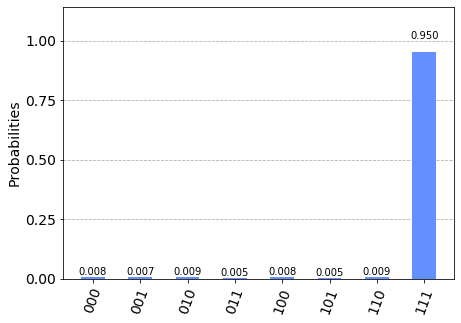

In [186]:
# Results
from qiskit.visualization import plot_histogram

counts = result.get_counts(qc)
plot_histogram(counts)